In [2]:
#libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
pd.options.mode.chained_assignment = None
import h2o
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#libraries we need
# !pip install h2o

from scipy.special import expit
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from h2o.estimators import H2OGradientBoostingEstimator
SEED  = 1111   # global random seed for better reproducibility

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# conda install -c conda-forge pydotplus

h2o.init(max_mem_size='24G', nthreads=4) # start h2o with plenty of memory and threads
h2o.remove_all()                         # clears h2o memory
h2o.no_progress() 

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 13 hours 24 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_zhangmaojn_tjj23l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,21.16 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
train = pd.read_csv('adult.data.txt',
                    names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])

In [4]:
test = pd.read_csv('adult.test.txt',
                    names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])

In [5]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [7]:
train.shape

(32561, 15)

In [8]:
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [9]:
## USE THE ABOVE TO REMOVE THE '?'

Replace all entries that contains ? with Null

In [10]:
train=train.replace(' ?', np.nan)

test=test.replace(' ?', np.nan)

Fill Null with 'None' type

In [11]:
train.update(train[['native-country','occupation','workclass']].fillna('None'))
test.update(test[['native-country','occupation','workclass']].fillna('None'))

In [12]:
train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [13]:
test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

train.head()

test.head()

In [13]:
train.to_csv('train.csv',index=False)

In [14]:
test.to_csv('test.csv',index=False)

## GLM

GLM can produce two categories of models: classification and regression.

Logistic regression is the GLM performing binary classification.

In [14]:
hf=h2o.H2OFrame(train)
gf=h2o.H2OFrame(test)

In [15]:
response_col = 'class'
predictors = list(train.columns.values)
predictors.remove('class')

In [16]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          lambda_ = 0,
                                          compute_p_values = True,remove_collinear_columns=True)
glm_model.train(predictors, response_col, training_frame= hf,validation_frame=gf)

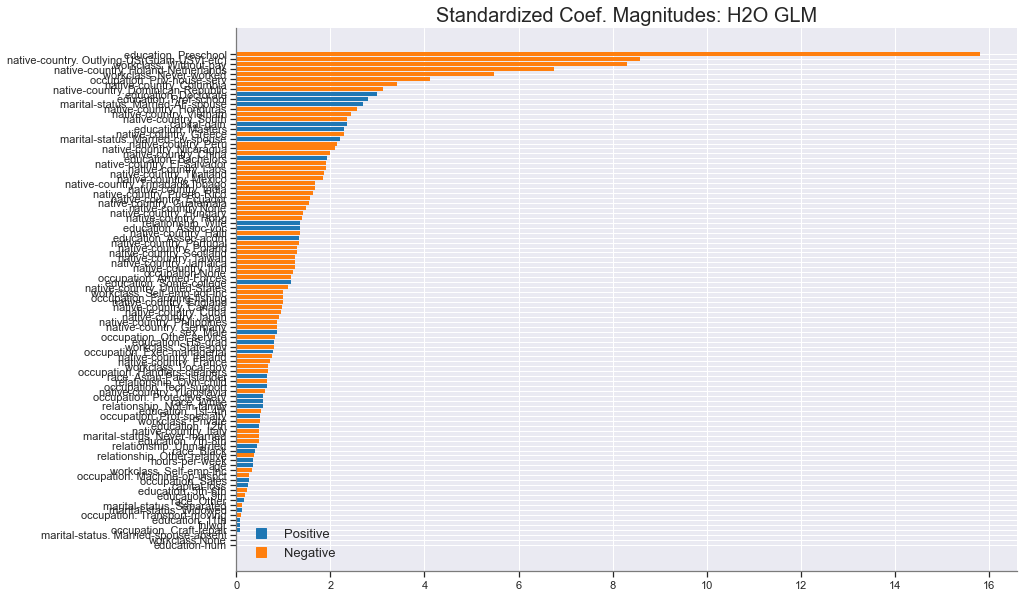

In [17]:
glm_model.std_coef_plot()

In [18]:
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1594084987592_265


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,100,98,8,Key_Frame__upload_918b8831a206c9199b45df2cb1934390.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10106348033611579
RMSE: 0.31790482905441336
LogLoss: 0.31579234496813513
Null degrees of freedom: 32560
Residual degrees of freedom: 32462
Null deviance: 35948.079435207605
Residual deviance: 20565.029089014897
AIC: 20763.029089014897
AUC: 0.9088752373735435
AUCPR: 0.7712473241115264
Gini: 0.817750474747087

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3767491898305199: 


,,<=50K,>50K,Error,Rate
0,<=50K,21914.0,2806.0,0.1135,(2806.0/24720.0)
1,>50K,2179.0,5662.0,0.2779,(2179.0/7841.0)
2,Total,24093.0,8468.0,0.1531,(4985.0/32561.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.376749,0.694341,201.0
1,max f2,0.146548,0.792030,296.0
2,max f0point5,0.547036,0.712320,144.0
3,max accuracy,0.488259,0.853966,163.0
4,max precision,0.997192,0.995204,2.0
5,max recall,0.001349,1.000000,397.0
6,max specificity,0.999824,0.999919,0.0
7,max absolute_mcc,0.376749,0.593197,201.0
8,max min_per_class_accuracy,0.272046,0.821196,243.0
9,max mean_per_class_accuracy,0.212801,0.826971,267.0



Gains/Lift Table: Avg response rate: 24.08 %, avg score: 28.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010012,1.049468,0.229288,0.229288,0.055215,11.132056,0.055215,11.132056,0.002296,0.002296,-77.071207,-77.071207
1,,2,0.020024,0.815509,2.012638,1.120963,0.484663,0.940024,0.269939,6.036040,0.020150,0.022446,101.263846,12.096319
2,,3,0.030005,0.604610,0.613316,0.952094,0.147692,0.701607,0.229273,4.261535,0.006122,0.028568,-38.668419,-4.790620
3,,4,0.040017,0.486692,0.649649,0.876425,0.156442,0.528956,0.211051,3.327674,0.006504,0.035072,-35.035088,-12.357540
4,,5,0.050029,0.430940,0.777031,0.856534,0.187117,0.457096,0.206262,2.753206,0.007780,0.042852,-22.296870,-14.346626
5,,6,0.100028,0.295723,0.691260,0.773922,0.166462,0.345382,0.186368,1.549664,0.034562,0.077414,-30.874041,-22.607796
6,,7,0.150026,0.253039,0.479545,0.675817,0.115479,0.273653,0.162743,1.124414,0.023977,0.101390,-52.045460,-32.418342
7,,8,0.200025,0.225380,0.446385,0.618468,0.107494,0.239032,0.148933,0.903102,0.022319,0.123709,-55.361465,-38.153242
8,,9,0.300021,0.187603,0.442559,0.559837,0.106572,0.201473,0.134814,0.669250,0.044255,0.167963,-55.744081,-44.016255
9,,10,0.400018,0.167851,0.580301,0.564953,0.139742,0.177463,0.136046,0.546313,0.058028,0.225992,-41.969905,-43.504707




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.10186864724194478
RMSE: 0.31916868148667843
LogLoss: 0.32007159216652054
Null degrees of freedom: 16280
Residual degrees of freedom: 16182
Null deviance: 17803.226528187093
Residual deviance: 10422.171184126331
AIC: 10620.171184126331
AUC: 0.9043290738465083
AUCPR: 0.7620463495075838
Gini: 0.8086581476930166

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35971235775243193: 


,,<=50K,>50K,Error,Rate
0,<=50K,10912.0,1523.0,0.1225,(1523.0/12435.0)
1,>50K,1047.0,2799.0,0.2722,(1047.0/3846.0)
2,Total,11959.0,4322.0,0.1579,(2570.0/16281.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.359712,0.685357,205.0
1,max f2,0.152187,0.783103,294.0
2,max f0point5,0.567155,0.704723,133.0
3,max accuracy,0.498998,0.852712,156.0
4,max precision,0.987869,0.996622,6.0
5,max recall,0.000340,1.000000,399.0
6,max specificity,0.999890,0.999920,0.0
7,max absolute_mcc,0.401633,0.584095,189.0
8,max min_per_class_accuracy,0.265866,0.818094,244.0
9,max mean_per_class_accuracy,0.212904,0.820168,268.0



Gains/Lift Table: Avg response rate: 23.62 %, avg score: 30.20 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010012,1.102738,0.337620,0.337620,0.079755,12.667286,0.079755,12.667286,0.003380,0.003380,-66.238048,-66.238048
1,,2,0.020023,0.829587,2.311395,1.324507,0.546012,0.987881,0.312883,6.827583,0.023141,0.026521,131.139516,32.450734
2,,3,0.030035,0.634733,0.779122,1.142712,0.184049,0.730132,0.269939,4.795099,0.007800,0.034321,-22.087804,14.271221
3,,4,0.040047,0.494560,0.701210,1.032337,0.165644,0.550240,0.243865,3.733885,0.007020,0.041342,-29.879023,3.233660
4,,5,0.050058,0.426691,0.571356,0.940141,0.134969,0.460105,0.222086,3.079129,0.005720,0.047062,-42.864389,-5.985950
5,,6,0.100055,0.295184,0.743675,0.841968,0.175676,0.343065,0.198895,1.711937,0.037181,0.084243,-25.632458,-15.803174
6,,7,0.150052,0.255160,0.431644,0.705249,0.101966,0.274377,0.166598,1.232946,0.021581,0.105824,-56.835622,-29.475058
7,,8,0.200049,0.226568,0.431644,0.636869,0.101966,0.239846,0.150445,0.984747,0.021581,0.127405,-56.835622,-36.313099
8,,9,0.300043,0.187957,0.470648,0.581473,0.111179,0.202312,0.137359,0.723989,0.047062,0.174467,-52.935227,-41.852674
9,,10,0.400037,0.168472,0.494050,0.559621,0.116708,0.178062,0.132197,0.587528,0.049402,0.223869,-50.594989,-44.037917




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-07-08 10:47:23,0.000 sec,0,17974.039718,0.552011
1,,2020-07-08 10:47:23,0.030 sec,1,11870.983007,0.364577
2,,2020-07-08 10:47:23,0.042 sec,2,10697.764911,0.328545
3,,2020-07-08 10:47:23,0.054 sec,3,10341.277080,0.317597
4,,2020-07-08 10:47:23,0.067 sec,4,10287.701867,0.315952
5,,2020-07-08 10:47:23,0.080 sec,5,10282.677384,0.315797
6,,2020-07-08 10:47:23,0.091 sec,6,10282.540629,0.315793
7,,2020-07-08 10:47:23,0.102 sec,7,10282.521293,0.315793
8,,2020-07-08 10:47:23,0.113 sec,8,10282.514545,0.315792


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35971235775242977: 


Gains/Lift Table: Avg response rate: 23.62 %, avg score: 30.20 %


AUC: 0.9043290738465083

In [60]:
glm_pred = glm_model.predict(gf)
glm_pred

predict,<=50K,>50K,StdErr
<=50K,0.99773,0.00226997,0.231683
<=50K,0.881624,0.118376,0.127049
>50K,0.616993,0.383007,0.142552
>50K,0.22624,0.77376,0.133312
<=50K,0.998745,0.00125482,0.192673
<=50K,0.995469,0.00453062,0.192952
<=50K,0.989807,0.0101928,0.172051
>50K,0.109742,0.890258,0.140758
<=50K,0.993699,0.00630083,0.160293
<=50K,0.951492,0.0485077,0.190746


## GLM WITH HYPERPARAMETERS

In [21]:
# Example of values to grid over for `lambda`
# import Grid Search

hyper_params = {'lambda': [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]}


glm = H2OGeneralizedLinearEstimator(family = 'binomial',remove_collinear_columns=True)

grid = H2OGridSearch(model = glm, hyper_params = hyper_params,
                     search_criteria = {'strategy': "Cartesian"})

grid.train(x = predictors, y = response_col, training_frame = hf, validation_frame = gf,nfolds=5,seed=1)

In [22]:
grid_table = grid.get_grid(sort_by = 'auc', decreasing = True)
grid_table

       lambda  \
0    [1.0E-5]   
1    [1.0E-4]   
2       [0.0]   
3     [0.001]   
4      [0.01]   
5       [0.1]   
6       [1.0]   
7       [0.5]   

                                                               model_ids  \
0  Grid_GLM_Key_Frame__upload_96e7c124d97d6b9ff2580ecf11ec45eb.hex_mo...   
1  Grid_GLM_Key_Frame__upload_96e7c124d97d6b9ff2580ecf11ec45eb.hex_mo...   
2  Grid_GLM_Key_Frame__upload_96e7c124d97d6b9ff2580ecf11ec45eb.hex_mo...   
3  Grid_GLM_Key_Frame__upload_96e7c124d97d6b9ff2580ecf11ec45eb.hex_mo...   
4  Grid_GLM_Key_Frame__upload_96e7c124d97d6b9ff2580ecf11ec45eb.hex_mo...   
5  Grid_GLM_Key_Frame__upload_96e7c124d97d6b9ff2580ecf11ec45eb.hex_mo...   
6  Grid_GLM_Key_Frame__upload_96e7c124d97d6b9ff2580ecf11ec45eb.hex_mo...   
7  Grid_GLM_Key_Frame__upload_96e7c124d97d6b9ff2580ecf11ec45eb.hex_mo...   

                   auc  
0   0.9066950328309124  
1   0.9064514115290591  
2   0.9064187900790345  
3   0.9035287787948915  
4   0.8979748053856812  
5   0.81899

In [23]:
best = grid_table.models[0]
print(best.actual_params['lambda'])

[1e-05]


In [24]:
best

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_Key_Frame__upload_96e7c124d97d6b9ff2580ecf11ec45eb.hex_model_python_1594162504634_4_model_7


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 1.0E-5 )",108,96,4,Key_Frame__upload_96e7c124d97d6b9ff2580ecf11ec45eb.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10109197433481228
RMSE: 0.3179496411930862
LogLoss: 0.31595218647655404
Null degrees of freedom: 32560
Residual degrees of freedom: 32464
Null deviance: 35948.079435207605
Residual deviance: 20575.43828772615
AIC: 20769.43828772615
AUC: 0.9088579747811375
AUCPR: 0.770910989807437
Gini: 0.817715949562275

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2945082987400751: 


,,<=50K,>50K,Error,Rate
0,<=50K,20737.0,3983.0,0.1611,(3983.0/24720.0)
1,>50K,1554.0,6287.0,0.1982,(1554.0/7841.0)
2,Total,22291.0,10270.0,0.1701,(5537.0/32561.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.294508,0.694274,234.0
1,max f2,0.152236,0.791826,292.0
2,max f0point5,0.547906,0.711984,140.0
3,max accuracy,0.487982,0.853905,161.0
4,max precision,0.994652,0.995842,3.0
5,max recall,0.000955,1.000000,398.0
6,max specificity,0.999805,0.999919,0.0
7,max absolute_mcc,0.377371,0.592814,202.0
8,max min_per_class_accuracy,0.271666,0.821157,243.0
9,max mean_per_class_accuracy,0.222228,0.827252,263.0



Gains/Lift Table: Avg response rate: 24.08 %, avg score: 24.12 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010012,9.974428e-01,4.127183,4.127183,0.993865,0.999329,0.993865,0.999329,0.041321,0.041321,312.718266,312.718266
1,,2,0.020024,9.772899e-01,4.076230,4.101706,0.981595,0.991030,0.987730,0.995179,0.040811,0.082132,307.622979,310.170623
2,,3,0.030005,9.427721e-01,3.948220,4.050649,0.950769,0.960295,0.975435,0.983575,0.039408,0.121541,294.822050,305.064905
3,,4,0.040017,9.055998e-01,3.719560,3.967813,0.895706,0.923977,0.955487,0.968664,0.037240,0.158781,271.955968,296.781318
4,,5,0.050029,8.696060e-01,3.592178,3.892640,0.865031,0.887153,0.937385,0.952352,0.035965,0.194746,259.217750,289.263993
5,,6,0.100028,7.271906e-01,3.285396,3.589111,0.791155,0.795357,0.864292,0.873879,0.164265,0.359010,228.539614,258.911126
6,,7,0.150026,6.064085e-01,2.729328,3.302575,0.657248,0.665012,0.795292,0.804271,0.136462,0.495473,172.932754,230.257535
7,,8,0.200025,4.941728e-01,2.318653,3.056633,0.558354,0.549083,0.736066,0.740484,0.115929,0.611402,131.865302,205.663254
8,,9,0.300021,3.135677e-01,1.669481,2.594296,0.402027,0.396907,0.624731,0.625970,0.166943,0.778345,66.948119,159.429609
9,,10,0.400018,1.933099e-01,1.142746,2.231437,0.275184,0.251542,0.537351,0.532370,0.114271,0.892616,14.274648,123.143655




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.1018047064504984
RMSE: 0.3190684980540987
LogLoss: 0.318451243908791
Null degrees of freedom: 16280
Residual degrees of freedom: 16184
Null deviance: 17803.226528187093
Residual deviance: 10369.409404158052
AIC: 10563.409404158052
AUC: 0.904836444362479
AUCPR: 0.7620522036014005
Gini: 0.809672888724958

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3688547897175389: 


,,<=50K,>50K,Error,Rate
0,<=50K,10980.0,1455.0,0.117,(1455.0/12435.0)
1,>50K,1077.0,2769.0,0.28,(1077.0/3846.0)
2,Total,12057.0,4224.0,0.1555,(2532.0/16281.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.368855,0.686245,202.0
1,max f2,0.153460,0.782943,290.0
2,max f0point5,0.561082,0.705285,133.0
3,max accuracy,0.475972,0.852773,163.0
4,max precision,0.986438,0.996575,6.0
5,max recall,0.001486,1.000000,397.0
6,max specificity,0.999856,0.999920,0.0
7,max absolute_mcc,0.371934,0.584489,201.0
8,max min_per_class_accuracy,0.267299,0.817853,241.0
9,max mean_per_class_accuracy,0.214404,0.820088,265.0



Gains/Lift Table: Avg response rate: 23.62 %, avg score: 23.77 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010012,0.997265,4.207259,4.207259,0.993865,0.999348,0.993865,0.999348,0.042122,0.042122,320.725860,320.725860
1,,2,0.020023,0.975668,4.207259,4.207259,0.993865,0.990128,0.993865,0.994738,0.042122,0.084243,320.725860,320.725860
2,,3,0.030035,0.938905,3.999493,4.138003,0.944785,0.959050,0.977505,0.982842,0.040042,0.124285,299.949274,313.800331
3,,4,0.040047,0.896042,3.843668,4.064420,0.907975,0.917322,0.960123,0.966462,0.038482,0.162767,284.366835,306.441957
4,,5,0.050058,0.857753,3.635902,3.978716,0.858896,0.876710,0.939877,0.948511,0.036401,0.199168,263.590249,297.871615
5,,6,0.100055,0.713599,3.297134,3.638134,0.778870,0.783343,0.859423,0.865978,0.164847,0.364015,229.713439,263.813448
6,,7,0.150052,0.598097,2.683472,3.320044,0.633907,0.655249,0.784282,0.795764,0.134165,0.498180,168.347215,232.004396
7,,8,0.200049,0.485653,2.241427,3.050473,0.529484,0.540630,0.720602,0.732000,0.112064,0.610244,124.142732,205.047259
8,,9,0.300043,0.307310,1.658968,2.586733,0.391892,0.389652,0.611054,0.617907,0.165887,0.776131,65.896825,158.673276
9,,10,0.400037,0.189368,1.107712,2.217034,0.261671,0.246380,0.523722,0.525040,0.110764,0.886895,10.771234,121.703443




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.10216354786983954
RMSE: 0.3196303300217918
LogLoss: 0.3193483690960733
Null degrees of freedom: 32560
Residual degrees of freedom: 32463
Null deviance: 35950.56206907465
Residual deviance: 20796.604492274488
AIC: 20992.604492274488
AUC: 0.9066950328309124
AUCPR: 0.7663264915247856
Gini: 0.8133900656618247

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30524369345207736: 


,,<=50K,>50K,Error,Rate
0,<=50K,20911.0,3809.0,0.1541,(3809.0/24720.0)
1,>50K,1686.0,6155.0,0.215,(1686.0/7841.0)
2,Total,22597.0,9964.0,0.1688,(5495.0/32561.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.305244,0.691379,233.0
1,max f2,0.154627,0.789111,297.0
2,max f0point5,0.558688,0.710457,140.0
3,max accuracy,0.503761,0.851878,160.0
4,max precision,0.996770,0.995062,2.0
5,max recall,0.000404,1.000000,399.0
6,max specificity,0.999814,0.999919,0.0
7,max absolute_mcc,0.411719,0.587422,192.0
8,max min_per_class_accuracy,0.270490,0.819862,248.0
9,max mean_per_class_accuracy,0.229928,0.824446,265.0



Gains/Lift Table: Avg response rate: 24.08 %, avg score: 24.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010012,9.974436e-01,4.127183,4.127183,0.993865,0.999342,0.993865,0.999342,0.041321,0.041321,312.718266,312.718266
1,,2,0.020024,9.776131e-01,4.063492,4.095337,0.978528,0.991038,0.986196,0.995190,0.040684,0.082005,306.349157,309.533712
2,,3,0.030005,9.433434e-01,3.909888,4.033647,0.941538,0.960977,0.971341,0.983809,0.039026,0.121030,290.988826,303.364738
3,,4,0.040017,9.067515e-01,3.745036,3.961439,0.901840,0.924630,0.953952,0.969003,0.037495,0.158526,274.503612,296.143919
4,,5,0.050029,8.693362e-01,3.592178,3.887542,0.865031,0.887846,0.936157,0.952761,0.035965,0.194490,259.217750,288.754151
5,,6,0.100028,7.271394e-01,3.252236,3.569986,0.783170,0.795787,0.859687,0.874298,0.162607,0.357097,225.223609,256.998633
6,,7,0.150026,6.062118e-01,2.731878,3.290674,0.657862,0.665610,0.792426,0.804750,0.136590,0.493687,173.187831,229.067418
7,,8,0.200025,4.950790e-01,2.257434,3.032404,0.543612,0.548779,0.730232,0.740767,0.112868,0.606555,125.743446,203.240391
8,,9,0.300021,3.133257e-01,1.694989,2.586645,0.408170,0.396885,0.622889,0.626151,0.169494,0.776049,69.498893,158.664455
9,,10,0.400018,1.928270e-01,1.138920,2.224741,0.274263,0.251068,0.535739,0.532388,0.113889,0.889938,13.892032,122.474128




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8383464,0.013066367,0.8308824,0.81901366,0.84780633,0.8496299,0.8443999
1,auc,0.9067729,0.0059722103,0.9023399,0.8984996,0.9106697,0.91063833,0.911717
2,aucpr,0.766541,0.017469566,0.75910425,0.746244,0.766701,0.79398966,0.76666605
3,err,0.16165356,0.013066367,0.16911764,0.18098636,0.15219365,0.15037014,0.15560006
4,err_count,1052.4,80.21409,1104.0,1167.0,1006.0,975.0,1010.0
5,f0point5,0.66045815,0.026054692,0.64955807,0.6240409,0.6768509,0.69209874,0.65974206
6,f1,0.6937628,0.01172566,0.6884876,0.6764624,0.70166075,0.70623684,0.6959663
7,f2,0.73132044,0.006972574,0.73238087,0.7384988,0.72835857,0.72096455,0.73639953
8,lift_top_group,4.1291766,0.099577524,4.09279,4.093359,4.113293,4.0449157,4.301524
9,logloss,0.3193717,0.010493397,0.32771584,0.3327602,0.31491843,0.31408235,0.3073817



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-07-07 15:55:17,0.000 sec,0,17974.039718,0.552011
1,,2020-07-07 15:55:17,0.010 sec,1,11871.013314,0.364890
2,,2020-07-07 15:55:17,0.015 sec,2,10697.780200,0.329136
3,,2020-07-07 15:55:17,0.021 sec,3,10341.290650,0.318606
4,,2020-07-07 15:55:17,0.028 sec,4,10287.719144,0.317573


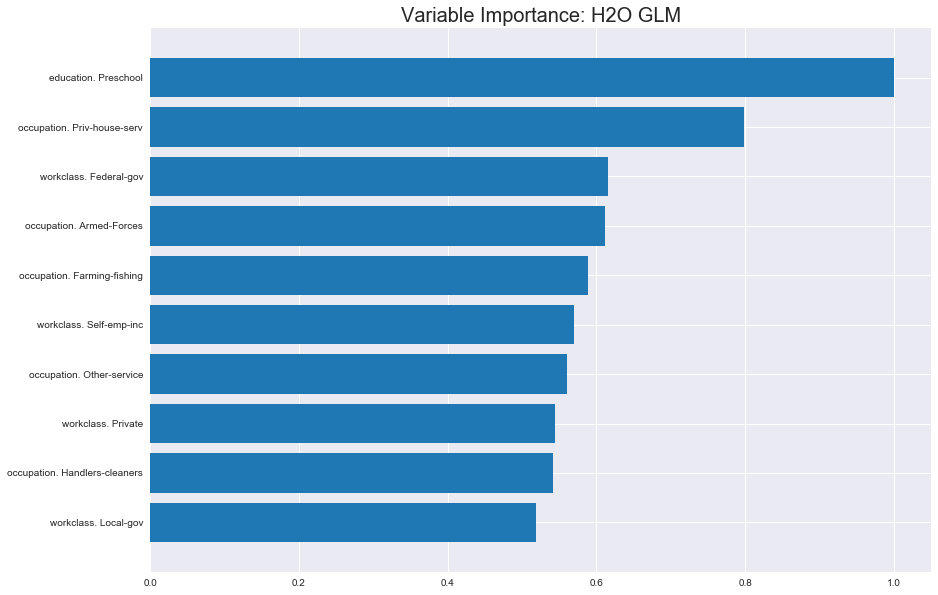

In [25]:
best.varimp_plot()

In [26]:
best.predict(gf)

predict,<=50K,>50K
<=50K,0.997053,0.00294736
<=50K,0.881809,0.118191
>50K,0.615354,0.384646
>50K,0.245103,0.754897
<=50K,0.99836,0.00164031
<=50K,0.995252,0.00474843
<=50K,0.989423,0.0105771
>50K,0.115269,0.884731
<=50K,0.993285,0.00671539
<=50K,0.950483,0.0495174


AUC: 0.9066950328309124

## GBM

#### PRE-PROCESSING FOR GBM


In [61]:
ss = hf.split_frame(seed = 1)
train_hf = ss[0]
valid_hf = ss[1]

### GBM WITHOUT HYPRERPARAMETERS

In [65]:
gbm = H2OGradientBoostingEstimator(nfolds=5,
                                        seed=1111,
                                        keep_cross_validation_predictions = True)
gbm.train(x=predictors, y=response_col, training_frame=hf)

# Eval performance:
perf = gbm.model_performance(gf)

# Generate predictions on a test set:
gbm_pred = gbm.predict(gf)

In [63]:
gbm.model_performance(gf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.09033907842424388
RMSE: 0.30056459941956554
LogLoss: 0.2885572457637678
Mean Per-Class Error: 0.16016157654750096
AUC: 0.9234384268816671
AUCPR: 0.8176605598174321
Gini: 0.8468768537633342

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29262006582812056: 


,,<=50K,>50K,Error,Rate
0,<=50K,10688.0,1747.0,0.1405,(1747.0/12435.0)
1,>50K,728.0,3118.0,0.1893,(728.0/3846.0)
2,Total,11416.0,4865.0,0.152,(2475.0/16281.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.292620,0.715876,228.0
1,max f2,0.184677,0.801689,272.0
2,max f0point5,0.570050,0.757417,131.0
3,max accuracy,0.503043,0.872428,153.0
4,max precision,0.983083,1.000000,0.0
5,max recall,0.010606,1.000000,397.0
6,max specificity,0.983083,1.000000,0.0
7,max absolute_mcc,0.405929,0.626779,187.0
8,max min_per_class_accuracy,0.258507,0.836349,241.0
9,max mean_per_class_accuracy,0.211048,0.839838,261.0



Gains/Lift Table: Avg response rate: 23.62 %, avg score: 23.70 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010012,0.970993,4.233229,4.233229,1.000000,0.974792,1.000000,0.974792,0.042382,0.042382,323.322933,323.322933
1,,2,0.020023,0.967365,4.233229,4.233229,1.000000,0.969179,1.000000,0.971985,0.042382,0.084763,323.322933,323.322933
2,,3,0.030035,0.960682,4.233229,4.233229,1.000000,0.964553,1.000000,0.969508,0.042382,0.127145,323.322933,323.322933
3,,4,0.040047,0.945393,4.207259,4.226737,0.993865,0.953634,0.998466,0.965539,0.042122,0.169267,320.725860,322.673665
4,,5,0.050058,0.920521,4.181288,4.217647,0.987730,0.934491,0.996319,0.959330,0.041862,0.211128,318.128787,321.764689
5,,6,0.100055,0.734801,3.635169,3.926587,0.858722,0.802755,0.927563,0.881090,0.181747,0.392876,263.516867,292.658657
6,,7,0.150052,0.598405,2.792683,3.548774,0.659705,0.668582,0.838314,0.810283,0.139626,0.532501,179.268323,254.877350
7,,8,0.200049,0.473739,2.350638,3.249332,0.555283,0.535181,0.767578,0.741529,0.117525,0.650026,135.063840,224.933169
8,,9,0.300043,0.289117,1.625165,2.708054,0.383907,0.373741,0.639713,0.618958,0.162507,0.812533,62.516482,170.805356
9,,10,0.400037,0.169406,0.977699,2.275531,0.230958,0.224741,0.537540,0.520419,0.097764,0.910296,-2.230084,127.553138


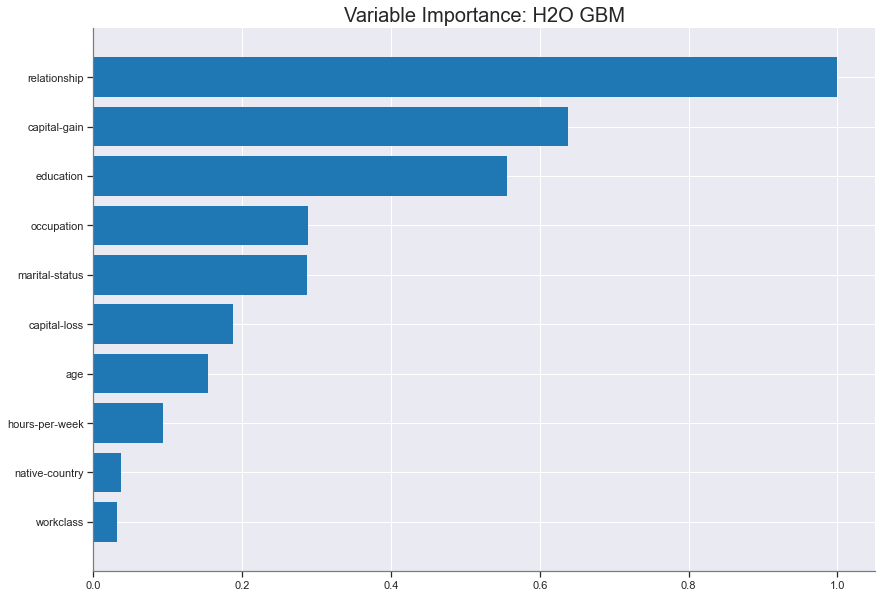

In [64]:
gbm.varimp_plot()

AUC: 0.9234384268816671

### GBM WITH HYPERPARAMETERS

* MAX DEPTH

In [31]:
#to load the model 
#best_gbm = h2o.import_mojo(path)

## XGBoost 

In [74]:
from h2o.estimators import H2OXGBoostEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 14 hours 37 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_zhangmaojn_tjj23l
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,21.15 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [75]:
# Build and train the model:
xgb = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)
xgb.train(x=predictors,
                  y=response_col,
                  training_frame=train_hf,
                  validation_frame=valid_hf)

In [76]:
# Eval performance:
xgb.model_performance(gf)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.08752865128134162
RMSE: 0.29585241469581014
LogLoss: 0.2754554443836803
Mean Per-Class Error: 0.15473629801645628
AUC: 0.9280555090317806
AUCPR: 0.8264562170678743
Gini: 0.8561110180635612

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3006711637973785: 


,,<=50K,>50K,Error,Rate
0,<=50K,10726.0,1709.0,0.1374,(1709.0/12435.0)
1,>50K,686.0,3160.0,0.1784,(686.0/3846.0)
2,Total,11412.0,4869.0,0.1471,(2395.0/16281.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.300671,0.725186,227.0
1,max f2,0.159961,0.808360,285.0
2,max f0point5,0.664160,0.761383,105.0
3,max accuracy,0.526798,0.874455,150.0
4,max precision,0.998991,1.000000,0.0
5,max recall,0.000979,1.000000,397.0
6,max specificity,0.998991,1.000000,0.0
7,max absolute_mcc,0.447204,0.637639,175.0
8,max min_per_class_accuracy,0.267872,0.842622,240.0
9,max mean_per_class_accuracy,0.196426,0.845264,269.0



Gains/Lift Table: Avg response rate: 23.62 %, avg score: 23.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010012,0.998770,4.233229,4.233229,1.000000,0.999078,1.000000,0.999078,0.042382,0.042382,323.322933,323.322933
1,,2,0.020023,0.997824,4.233229,4.233229,1.000000,0.998333,1.000000,0.998705,0.042382,0.084763,323.322933,323.322933
2,,3,0.030035,0.994976,4.207259,4.224572,0.993865,0.996752,0.997955,0.998054,0.042122,0.126885,320.725860,322.457242
3,,4,0.040047,0.989234,4.233229,4.226737,1.000000,0.992251,0.998466,0.996603,0.042382,0.169267,323.322933,322.673665
4,,5,0.050058,0.978641,4.207259,4.222841,0.993865,0.984763,0.997546,0.994235,0.042122,0.211388,320.725860,322.284104
5,,6,0.100055,0.752499,3.671572,3.947376,0.867322,0.854541,0.932474,0.924431,0.183567,0.394956,267.157237,294.737591
6,,7,0.150052,0.626268,2.865491,3.586895,0.676904,0.688842,0.847319,0.845933,0.143266,0.538222,186.549061,258.689509
7,,8,0.200049,0.490065,2.350638,3.277926,0.555283,0.557434,0.774332,0.773831,0.117525,0.655746,135.063840,227.792581
8,,9,0.300043,0.298272,1.669369,2.741850,0.394349,0.385246,0.647697,0.644329,0.166927,0.822673,66.936931,174.185007
9,,10,0.400037,0.158436,0.975099,2.300230,0.230344,0.223597,0.543375,0.539162,0.097504,0.920177,-2.490111,130.023009


In [77]:
# Generate predictions on a test set (if necessary):
xgb_pred = xgb.predict(gf)

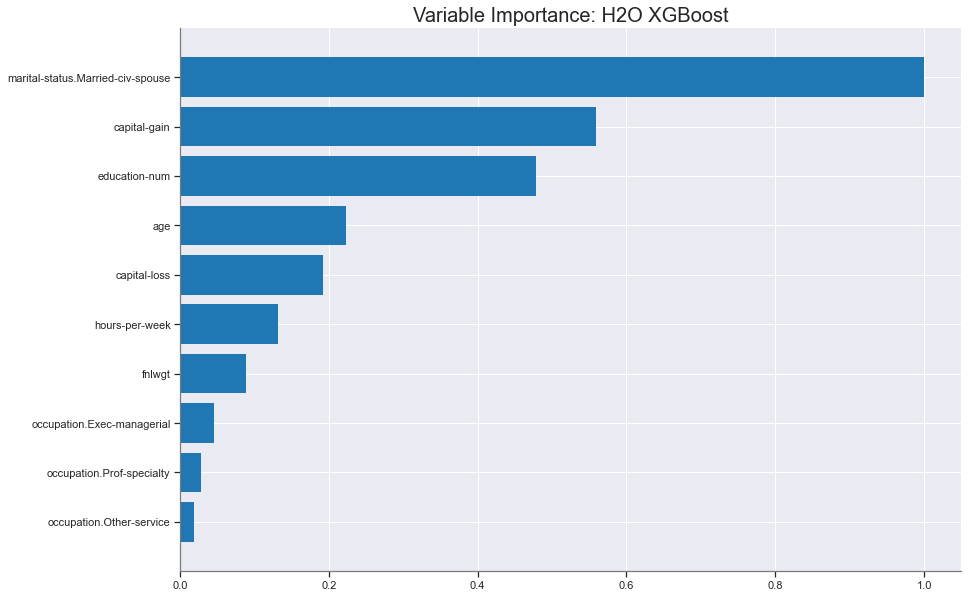

In [78]:
xgb.varimp_plot()

## RESIDUAL ANALYSIS

Plotting the residual values against the predicted values is a time-honored model assessment technique and a great way to see all your modeling results in two dimensions.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

Give actual class lables: 

* <=50 -- 0    
* \>50 -- 1

In [28]:
class_dict = {0:'<=50K', 1:'>50K'}

In [29]:
test['lable'] = pd.factorize(test['class'])[0]

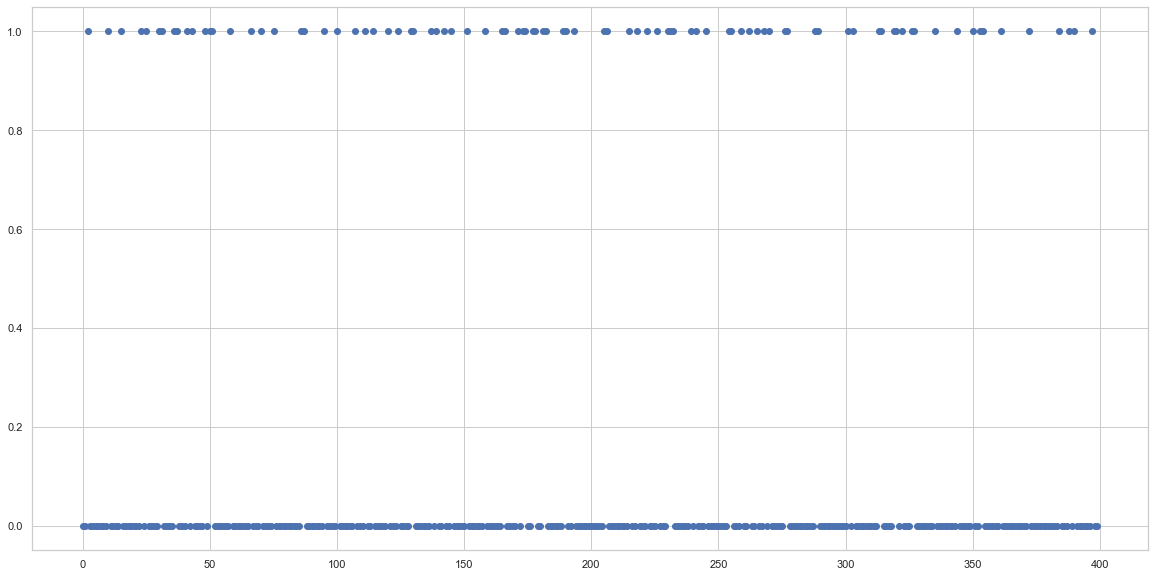

In [122]:
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(20, 10)) 
test_sub = test.sample(n=400).reset_index()
values = list(test_sub.index)
ax.scatter(values,test_sub['lable'])
plt.show()

In [93]:
test_sub.index

RangeIndex(start=0, stop=400, step=1)

#### GLM Plot

In [23]:
glm_pred

,predict,<=50K,>50K,StdErr
0,<=50K,0.997730,0.002270,0.231683
1,<=50K,0.881624,0.118376,0.127049
2,>50K,0.616993,0.383007,0.142552
3,>50K,0.226240,0.773760,0.133312
4,<=50K,0.998745,0.001255,0.192673
...,...,...,...,...
16276,<=50K,0.898212,0.101788,0.100587
16277,<=50K,0.978524,0.021476,0.312090
16278,>50K,0.304860,0.695140,0.069747
16279,<=50K,0.745282,0.254718,0.241059


In [22]:
type(glm_pred)

pandas.core.frame.DataFrame

In [40]:
glm_pred = glm_pred.as_data_frame()

In [48]:
glm_pred['glm_yhat']=glm_pred[" >50K"]

In [56]:
sample = glm_pred.sample(n=400).reset_index()

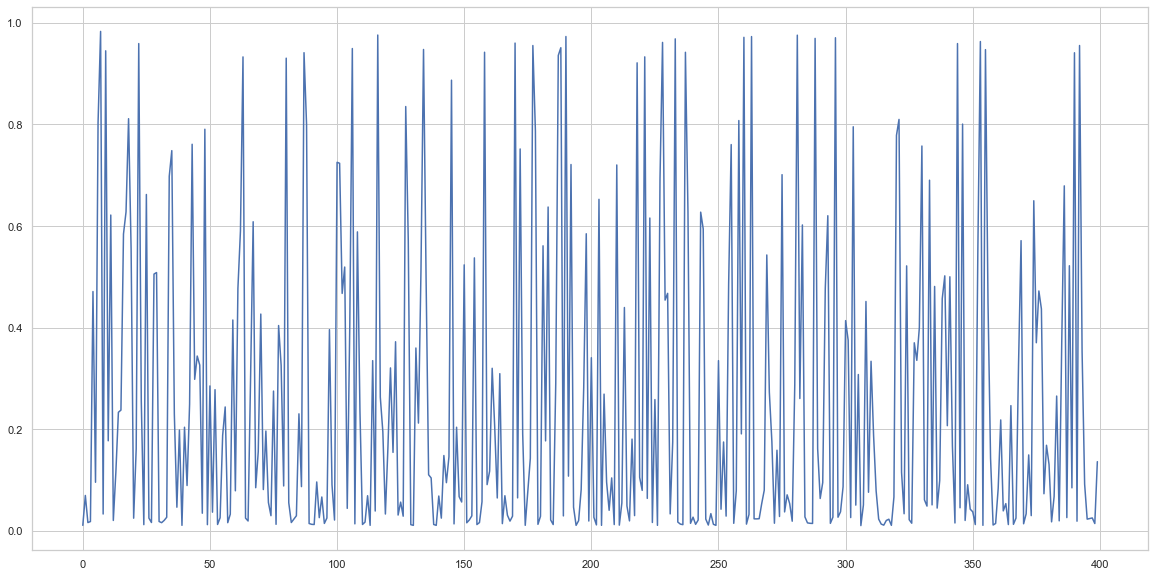

In [123]:
fig, ax = plt.subplots(figsize=(20, 10)) 
ax.plot(sample['glm_yhat'])
plt.show()

#### GBM Plot

In [ ]:
gbm_pred = gbm_pred.as_data_frame()

In [71]:
gbm_pred['gbm_yhat']=gbm_pred[" >50K"]
gbm_sample = gbm_pred.sample(n=400).reset_index()

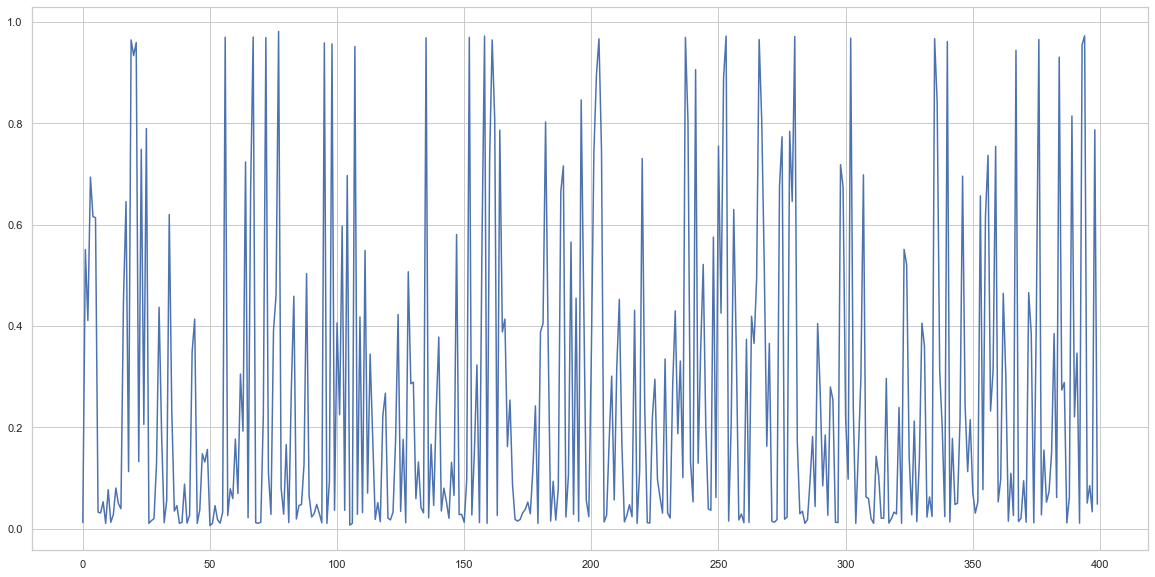

In [124]:
fig, ax = plt.subplots(figsize=(20, 10)) 
ax.plot(gbm_sample['gbm_yhat'])
plt.show()

#### XGB Plot

In [79]:
xgb_pred = xgb_pred.as_data_frame()

In [80]:
xgb_pred['xgb_yhat']=xgb_pred[" >50K"]
xgb_sample = xgb_pred.sample(n=400).reset_index()

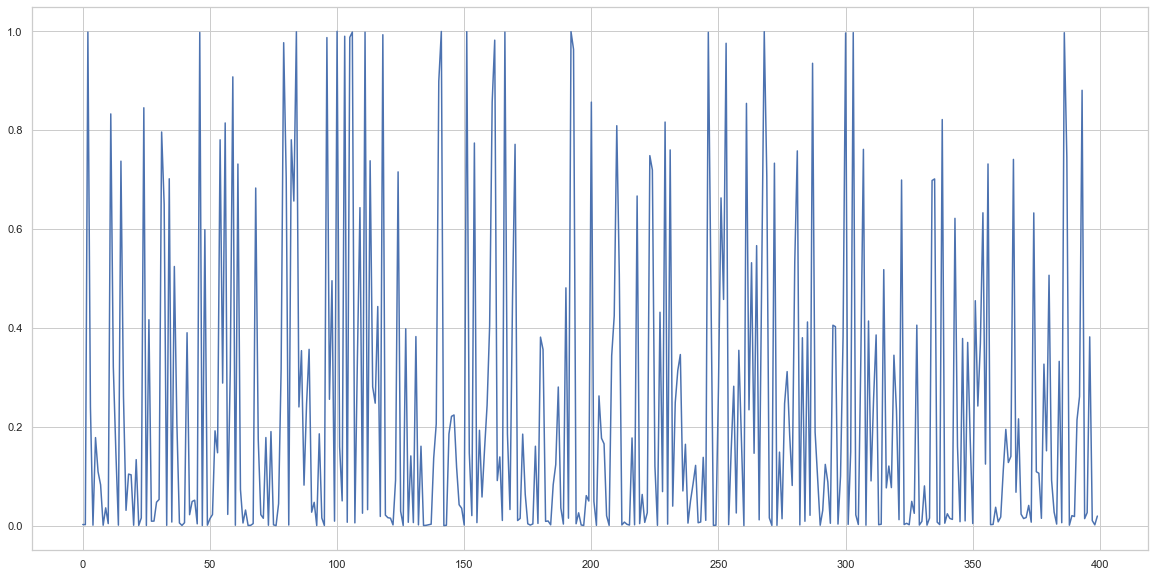

In [125]:
fig, ax = plt.subplots(figsize=(20, 10)) 
ax.plot(xgb_sample['xgb_yhat'])
plt.show()

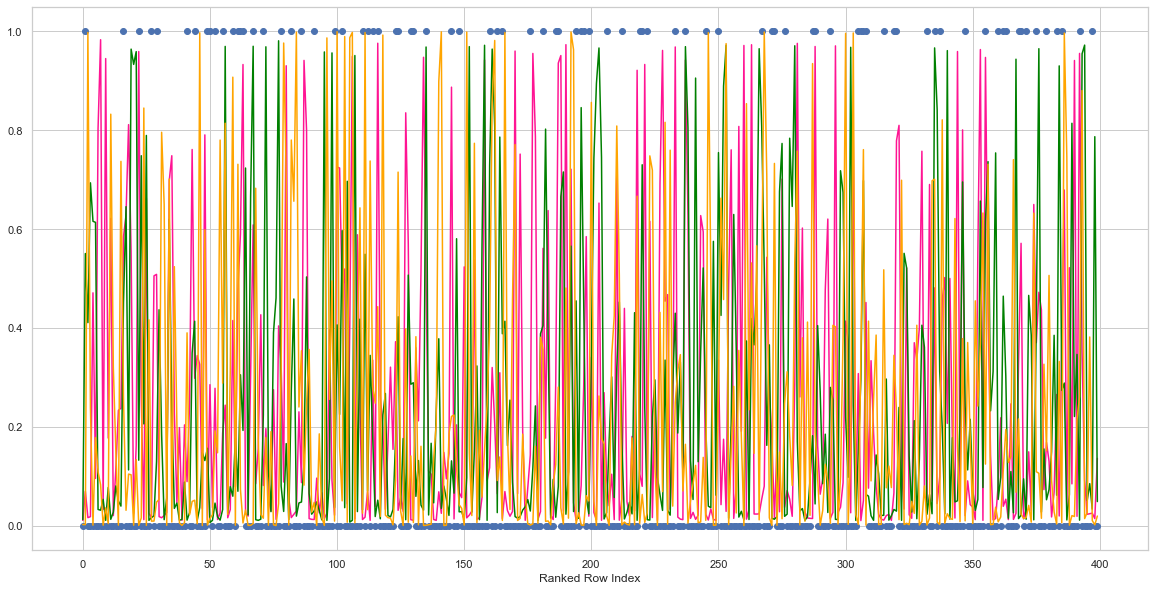

In [119]:

fig, ax = plt.subplots(figsize=(20, 10)) 
ax.scatter(values,test_sub['lable'])
plt.plot(sample['glm_yhat'],color='deeppink')
plt.plot(gbm_sample['gbm_yhat'],color='green')
plt.plot(xgb_sample['xgb_yhat'],color='orange')
_ = ax.set_xlabel('Ranked Row Index')


Text(0.5, 1.0, 'XGB Prediction vs. Actual >50K')

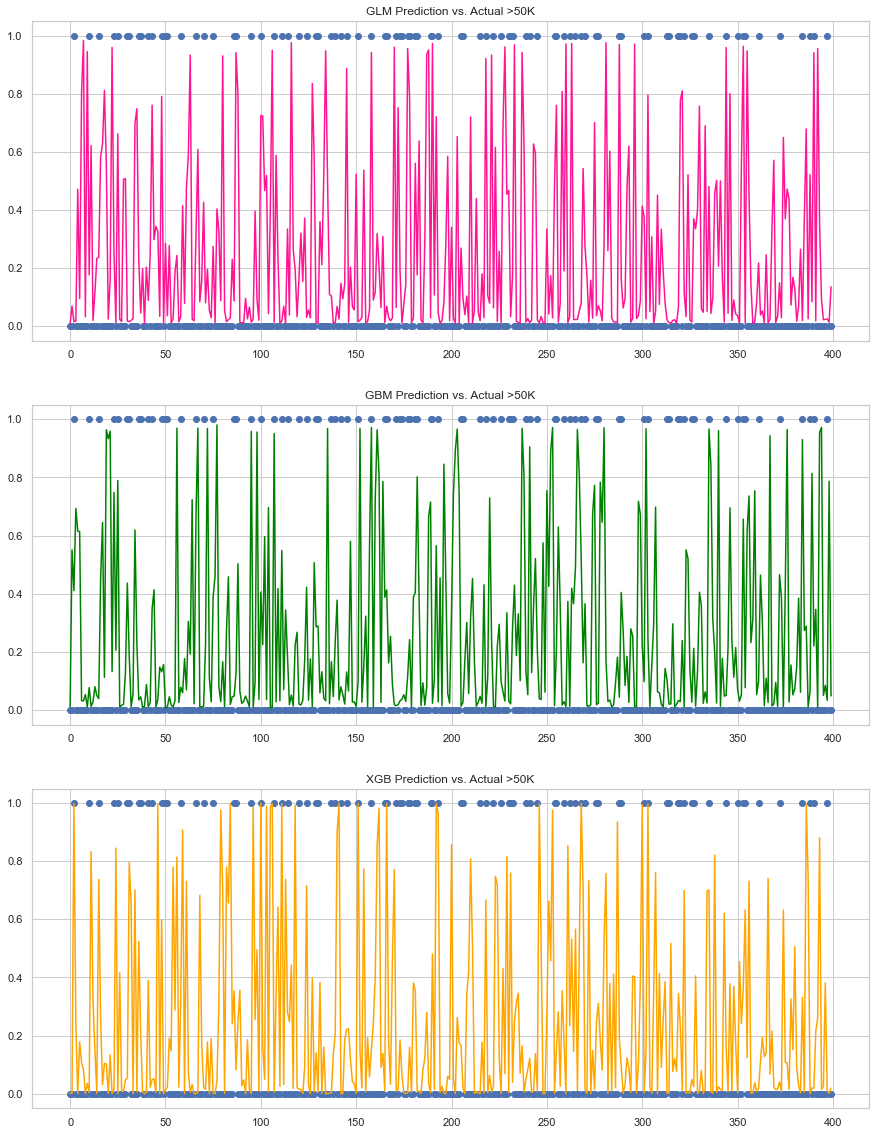

In [126]:
sns.set_style('whitegrid') 
fig, axs = plt.subplots(3, 1, figsize=(15, 20), sharey=True)
axs[0].scatter(values,test_sub['lable'])
axs[0].plot(sample['glm_yhat'],color='deeppink')
axs[0].set_title('GLM Prediction vs. Actual >50K')
axs[1].scatter(values,test_sub['lable'])
axs[1].plot(gbm_sample['gbm_yhat'],color='green')
axs[1].set_title('GBM Prediction vs. Actual >50K')
axs[2].scatter(values,test_sub['lable'])
axs[2].plot(xgb_sample['xgb_yhat'],color='orange')
axs[2].set_title('XGB Prediction vs. Actual >50K')